# General Instructions
- This take-home test is intended for candidates applying for the role of a [Tech Coach](https://boards.greenhouse.io/udacity/jobs/4512627002).
- Please submit a solution within 4 days of receiving the test.
- Please feel free to refer to any resources available online but do cite them in your comments.
- Feel free to use libraries like Pandas, Numpy, Scipy, Matplotlib, Seaborn, Plotly, Geopandas and KeplerGL for exploration and analysis.
- We expect your submission to be original and insightful.
- Please write clean, idiomatic code.    
- You can either work on your own system, use Google Colab or Kaggle.
- Please turn in a copy of this notebook containing your solution and a pdf of the same.
- Please ensure that the notebook and the pdf contain outputs from each cell in the notebook.


# Objective
You are required to analyze the New York [Vehicle Collision Dataset](https://www.kaggle.com/new-york-city/nypd-motor-vehicle-collisions#nypd-motor-vehicle-collisions.csv). 
The size of the dataset is around 400MB. The aim of the analysis is as follows:

1. Understanding the dataset through summary statistics.
2. Perform exploratoratory analysis to reveal spatial and temporal trends in the data.
3. Clean the data.
4. Perform hypothesis testing (instructions in latter sections).

## Load And Describe The Data
Load the dataset and describe some characteristics of the data, like descriptive statistics, distributions and missing and invalid data.

In [0]:
# Import Libraries

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# File from Drive using file-ID


downloaded = drive.CreateFile({'id':'1kjcKZvSGWGJ3w5dov0kSVH3zWxBgxIYF'})
downloaded.GetContentFile('nypd-motor-vehicle-collisions.csv')

In [0]:
# importing all generally used libraries which are being used during data analysis

import pandas as pd
import numpy as np
from datetime import datetime,date
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
# importing dataset

crash = pd.read_csv('nypd-motor-vehicle-collisions.csv') 

# checking the number of rows and columns in our dataset

print("Number of rows/observations : ", crash.shape[0])
print("Number of features/columns : ", crash.shape[1])

Number of rows/observations :  1294012
Number of features/columns :  29


In [7]:
# how data look likes for first 10 rows

crash.head(10)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-06-26T00:00:00,0:00,BROOKLYN,11215,40.667470,-73.979290,"{'latitude': '40.66747', 'longitude': '-73.979...",NaN,NaN,506 7 STREET,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-06-26T00:00:00,0:00,BROOKLYN,11218,40.641113,-73.966324,"{'latitude': '40.641113', 'longitude': '-73.96...",NaN,NaN,358 ARGYLE ROAD,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2018-06-26T00:00:00,0:00,MANHATTAN,10065,40.766666,-73.967070,"{'latitude': '40.766666', 'longitude': '-73.96...",EAST 65 STREET,PARK AVENUE,NaN,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,Unspecified,NaN,NaN,NaN,3930150,Sedan,Sedan,NaN,NaN,NaN
3,2018-06-26T00:00:00,0:00,NaN,NaN,40.826275,-73.859710,"{'latitude': '40.826275', 'longitude': '-73.85...",BRUCKNER BOULEVARD,WHITE PLAINS ROAD,NaN,0,0,0,0,0,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3929327,Sedan,Sedan,NaN,NaN,NaN
4,2018-06-26T00:00:00,0:00,NaN,NaN,40.699265,-73.727170,"{'latitude': '40.699265', 'longitude': '-73.72...",CROSS ISLAND PARKWAY,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
5,2018-06-26T00:00:00,0:00,BRONX,10457,40.844788,-73.891680,"{'latitude': '40.844788', 'longitude': '-73.89...",NaN,NaN,1923 CROTONA AVENUE,1,0,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3930216,Sedan,Bike,NaN,NaN,NaN
6,2018-06-26T00:00:00,0:00,BROOKLYN,11229,40.606007,-73.955830,"{'latitude': '40.606007', 'longitude': '-73.95...",AVENUE R,EAST 17 STREET,NaN,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3929796,Pick-up Truck,Sedan,NaN,NaN,NaN
7,2018-06-26T00:00:00,0:00,NaN,NaN,40.806915,-73.935570,"{'latitude': '40.806915', 'longitude': '-73.93...",EAST 129 STREET,NaN,NaN,1,0,0,0,0,0,1,0,Following Too Closely,Driver Inattention/Distraction,NaN,NaN,NaN,3931350,Sedan,Sedan,NaN,NaN,NaN
8,2018-06-26T00:00:00,0:00,NaN,NaN,40.731346,-73.917435,"{'latitude': '40.731346', 'longitude': '-73.91...",LONG ISLAND EXPRESSWAY,NaN,NaN,1,0,0,0,0,0,1,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3929094,Sedan,Taxi,NaN,NaN,NaN
9,2018-06-26T00:00:00,0:05,QUEENS,11366,40.721500,-73.804400,"{'latitude': '40.7215', 'longitude': '-73.8044...",NaN,NaN,164-06 UNION TURNPIKE,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3929579,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


#### Observations :
- No need of LOCATION column as LATITUDE and LONGITUDE columns are representing same information { will drop in next section 'Clean The Data' }.

- Many columns (like BOROUGH, ON STREET NAME etc) have missing values { will drop or impute values in place of missing values in next section 'Clean The Data }.

In [8]:
# .describe() outputs value in scientific notation so to suppress this notation, first line of code is used which gives values upto three decimal points
# .describe() without any parameter only give statistics summary for numerical columns only

pd.options.display.float_format = '{:.3f}'.format
crash.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
count,1073891.000,1073891.000,1294012.000,1294012.000,1294012.000,1294012.000,1294012.000,1294012.000,1294012.000,1294012.000,1294012.000
mean,40.712,-73.912,0.257,0.001,0.052,0.001,0.020,0.000,0.186,0.000,2458176.415
std,0.678,1.688,0.656,0.036,0.237,0.026,0.143,0.009,0.617,0.023,1515240.093
min,0.000,-201.360,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.000
25%,40.669,-73.978,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,325742.750
50%,40.723,-73.931,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3283126.500
75%,40.767,-73.868,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3606712.250
max,41.126,0.000,43.000,8.000,27.000,6.000,4.000,2.000,43.000,5.000,3931350.000


#### Observations :
- The first row (count) is showing number of non-null values in each of the numerical columns. The count (1073891) for LATITUDE and LONGITUDE columns doesn't equal to number of rows (1294012) implies these two columns have missing values.

- Minimum, Maximum and Mean values for LATITUDE column are 0, 41.126 and 40.712 respectively which implies most of the values are around 40. Even 25, 50 and 75 percentile values are also around 40. From these all values, we can say that there might be chance of outliers near value 0.

- Most of the values are concentrated around 73 for LONGITUDE column, we can observe this from mean, 25, 50 and 75 percentile values.

- While columns NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED, NUMBER OF MOTORIST KILLED have almost similar value as we can see min, mean etc are almost same. 


In [9]:
# .describe() with  "include='object'" parameter only give summary for categorical columns only

crash.describe(include='object')

,DATE,TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,1294012,1294012,919889,919782.000,1073891,1037155,952164,208671,1286823,1107476,83270,17880,4440,1283443,1090957,113320,45265,9540
unique,2187,1440,5,419.000,164558,10604,16929,105951,57,52,45,42,32,349,386,91,54,36
top,2014-01-21T00:00:00,16:00,BROOKLYN,11207.000,"{'latitude': '40.6960346', 'longitude': '-73.9...",,,,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
freq,1161,17780,283491,10213.000,673,25765,33212,64094,602259,937598,76434,16546,4142,715228,537550,63653,24741,5475


#### Observation :
- All the columns have missing values except DATE and TIME as we can see count value is not equal to number of rows (1294012).

- Unique value for all the columns is not equal to number of rows (1294012), which implies lots of values in each columns are repeating.

In [10]:
latest_date = crash.iloc[0].DATE
oldest_date = crash.iloc[-1].DATE

print("first row value of DATE column : ",latest_date)
print("last row value of DATE column : ",oldest_date)

first row value of DATE column :  2018-06-26T00:00:00
last row value of DATE column :  2012-07-01T00:00:00


In [11]:
latest_date = crash.iloc[1000].DATE
oldest_date = crash.iloc[-1001].DATE

print("1001th row value of DATE column : ",latest_date)
print("last 1001th row value of DATE column : ",oldest_date)

1001th row value of DATE column :  2018-06-25T00:00:00
last 1001th row value of DATE column :  2012-07-02T00:00:00


#### Observation :
- From last two cell, we observed that top rows (index with 0, 1, 2, 3....) represents latest date (current data) while last rows (1294011, 1294010.....) represents oldest date (old data).

In [12]:
# checking number of distinct value for 'UNIQUE KEY' column

crash['UNIQUE KEY'].nunique()

1294012

#### Observation :
- For UNIQUE KEY column, the number of unique value is equal to number of rows so basically it is acting like primary key (DBMS) which help in identifying each row but there is no need of this column as row index is doing same work { will drop in next section 'Clean The Data' }.

## Clean The Data
Remove any rows or columns that contain a high volume of missing or invalid data.

**Hint:** You may have to look up facts like the geographical extents of the boroughs of the city and verify that the locations(latitude, longitude) in the data are valid. 

In [0]:
# last section, we had discussed to drop LOCATION and UNIQUE KEY 

dropping_columns = ['LOCATION', 'UNIQUE KEY']
crash.drop(dropping_columns,axis = 1, inplace = True)

In [14]:
# checking percentage of missing values in each of the columns 

crash.isnull().sum()/len(crash) * 100

DATE                             0.000
TIME                             0.000
BOROUGH                         28.912
ZIP CODE                        28.920
LATITUDE                        17.011
LONGITUDE                       17.011
ON STREET NAME                  19.850
CROSS STREET NAME               26.418
OFF STREET NAME                 83.874
NUMBER OF PERSONS INJURED        0.000
NUMBER OF PERSONS KILLED         0.000
NUMBER OF PEDESTRIANS INJURED    0.000
NUMBER OF PEDESTRIANS KILLED     0.000
NUMBER OF CYCLIST INJURED        0.000
NUMBER OF CYCLIST KILLED         0.000
NUMBER OF MOTORIST INJURED       0.000
NUMBER OF MOTORIST KILLED        0.000
CONTRIBUTING FACTOR VEHICLE 1    0.556
CONTRIBUTING FACTOR VEHICLE 2   14.415
CONTRIBUTING FACTOR VEHICLE 3   93.565
CONTRIBUTING FACTOR VEHICLE 4   98.618
CONTRIBUTING FACTOR VEHICLE 5   99.657
VEHICLE TYPE CODE 1              0.817
VEHICLE TYPE CODE 2             15.692
VEHICLE TYPE CODE 3             91.243
VEHICLE TYPE CODE 4      

#### Observations : 
- Many columns (like CONTRIBUTING FACTOR VEHICLE 3, VEHICLE TYPE CODE 3 etc) have missing values greater than 90%.So We will drop these columns as these will not help in any way.



In [0]:
# dropping columns which have missing values greater than 30%

crash = crash[crash.columns[crash.isnull().sum()/len(crash) * 100 < 30 ]] 

In [16]:
print("New number of features/columns : ", crash.shape[1])

New number of features/columns :  20


In [17]:
# dropping rows which have missing values greater than 70%

crash = crash.dropna(thresh=14)
print("New number of rows/observations : ", crash.shape[0])

New number of rows/observations :  1283095


In [18]:
# checking how many columns still have missing value

crash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283095 entries, 0 to 1294011
Data columns (total 20 columns):
DATE                             1283095 non-null object
TIME                             1283095 non-null object
BOROUGH                          919756 non-null object
ZIP CODE                         919651 non-null object
LATITUDE                         1073200 non-null float64
LONGITUDE                        1073200 non-null float64
ON STREET NAME                   1033742 non-null object
CROSS STREET NAME                951826 non-null object
NUMBER OF PERSONS INJURED        1283095 non-null int64
NUMBER OF PERSONS KILLED         1283095 non-null int64
NUMBER OF PEDESTRIANS INJURED    1283095 non-null int64
NUMBER OF PEDESTRIANS KILLED     1283095 non-null int64
NUMBER OF CYCLIST INJURED        1283095 non-null int64
NUMBER OF CYCLIST KILLED         1283095 non-null int64
NUMBER OF MOTORIST INJURED       1283095 non-null int64
NUMBER OF MOTORIST KILLED        1283095

In [19]:
# filling NAN Value
# for categorical variable, NAN values are replaced by Mode value
# for continuous variables, NAN values are replaced by Meadian value

crash['BOROUGH'].fillna(0, inplace=True)
# "BROOKLYN" occur maximum time as we have found during .describe() step
crash['BOROUGH'].replace(0,"BROOKLYN", inplace=True)

crash['ZIP CODE'].fillna(0, inplace=True)
# "11207.000" occur maximum time as we have found during .describe() step
crash['ZIP CODE'].replace(0,"11207.000", inplace=True)

# 'ON STREET NAME' column contains two types of invalid data, one is space(' ') and another is NAN values
crash['ON STREET NAME'].replace(' ',"BROADWAY", inplace=True)
crash['ON STREET NAME'].fillna(0, inplace=True)
crash['ON STREET NAME'].replace(0,"BROADWAY", inplace=True)

# 'CROSS STREET NAME' column contains two types of invalid data, one is space(' ') and another is NAN values
crash['CROSS STREET NAME'].replace(' ',"3 AVENUE", inplace=True)
crash['CROSS STREET NAME'].fillna(0, inplace=True)
crash['CROSS STREET NAME'].replace(0,"3 AVENUE", inplace=True)

# "PASSENGER VEHICLE" occur maximum time as we have found during .describe() step
crash['VEHICLE TYPE CODE 1'].fillna(0, inplace=True)
crash['VEHICLE TYPE CODE 1'].replace(0,"PASSENGER VEHICLE", inplace=True)

# "PASSENGER VEHICLE" occur maximum time as we have found during .describe() step
crash['VEHICLE TYPE CODE 2'].fillna(0, inplace=True)
crash['VEHICLE TYPE CODE 2'].replace(0,"PASSENGER VEHICLE", inplace=True)

crash['LATITUDE'].fillna(crash['LATITUDE'].median(), inplace=True)

crash['LONGITUDE'].fillna(crash['LONGITUDE'].median(), inplace=True)

# 'CONTRIBUTING FACTOR VEHICLE 1' column contains two types of invalid data, one is 'Unspecified' and another is NAN values
crash['CONTRIBUTING FACTOR VEHICLE 1'].replace('Unspecified', 0, inplace=True)
crash['CONTRIBUTING FACTOR VEHICLE 1'].replace(0, 'Driver Inattention/Distraction', inplace=True)
crash['CONTRIBUTING FACTOR VEHICLE 1'].fillna(0, inplace=True)
crash['CONTRIBUTING FACTOR VEHICLE 1'].replace(0,"Driver Inattention/Distraction", inplace=True)

# 'CONTRIBUTING FACTOR VEHICLE 2' column contains two types of invalid data, one is 'Unspecified' and another is NAN values
crash['CONTRIBUTING FACTOR VEHICLE 2'].replace('Unspecified', 0, inplace=True)
crash['CONTRIBUTING FACTOR VEHICLE 2'].replace(0, 'Driver Inattention/Distraction', inplace=True)
crash['CONTRIBUTING FACTOR VEHICLE 2'].fillna(0, inplace=True)
crash['CONTRIBUTING FACTOR VEHICLE 2'].replace(0,"Driver Inattention/Distraction", inplace=True)



# checking again is any missing values in any of the columns 

crash.isnull().sum()/len(crash) * 100 

DATE                            0.000
TIME                            0.000
BOROUGH                         0.000
ZIP CODE                        0.000
LATITUDE                        0.000
LONGITUDE                       0.000
ON STREET NAME                  0.000
CROSS STREET NAME               0.000
NUMBER OF PERSONS INJURED       0.000
NUMBER OF PERSONS KILLED        0.000
NUMBER OF PEDESTRIANS INJURED   0.000
NUMBER OF PEDESTRIANS KILLED    0.000
NUMBER OF CYCLIST INJURED       0.000
NUMBER OF CYCLIST KILLED        0.000
NUMBER OF MOTORIST INJURED      0.000
NUMBER OF MOTORIST KILLED       0.000
CONTRIBUTING FACTOR VEHICLE 1   0.000
CONTRIBUTING FACTOR VEHICLE 2   0.000
VEHICLE TYPE CODE 1             0.000
VEHICLE TYPE CODE 2             0.000
dtype: float64

## Explore the data.
Use plotting libraries to visualize aspects like the location, time, cause other factors related to the collisions. This will also help you come up with interesting hypotheses.

In [0]:
cat = crash.select_dtypes('object').columns.to_list()
conti = crash.select_dtypes('int64').columns.to_list()
conti.extend(['LATITUDE','LONGITUDE'])

crash_cat = crash[cat]
crash_conti = crash[conti]

In [21]:
# for each column checking the number of of unique value in that column, number of times each value is appearing

for i in crash.columns.tolist():
    print("Column : ",i)
    print("Number of unique value in each column : ",crash[i].nunique())
    print(crash[i].value_counts())
    print("*"*71)

Column :  DATE
Number of unique value in each column :  2187
2014-01-21T00:00:00    1154
2017-12-15T00:00:00     993
2018-06-20T00:00:00     976
2017-05-19T00:00:00     960
2014-02-03T00:00:00     951
                       ... 
2014-12-25T00:00:00     301
2012-10-29T00:00:00     290
2016-02-15T00:00:00     289
2013-12-25T00:00:00     256
2015-01-27T00:00:00     186
Name: DATE, Length: 2187, dtype: int64
***********************************************************************
Column :  TIME
Number of unique value in each column :  1440
16:00    17693
17:00    17388
15:00    17274
18:00    16035
14:00    15326
         ...  
3:34        36
3:51        36
3:43        35
3:41        33
3:31        27
Name: TIME, Length: 1440, dtype: int64
***********************************************************************
Column :  BOROUGH
Number of unique value in each column :  5
BROOKLYN         646792
QUEENS           241199
MANHATTAN        229290
BRONX            123833
STATEN ISLAND     41981
Na

For train data :


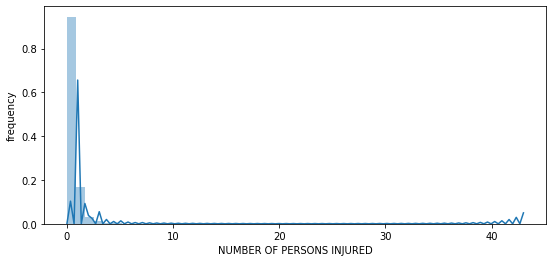

Skewness :  4.8149428132208865
*****************************************************************************************************


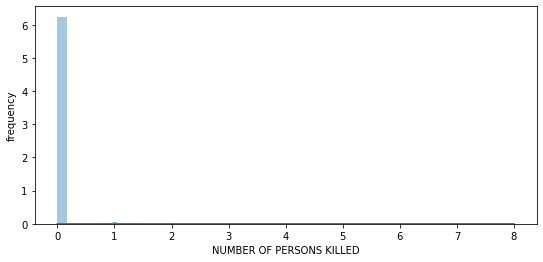

Skewness :  42.16177101770935
*****************************************************************************************************


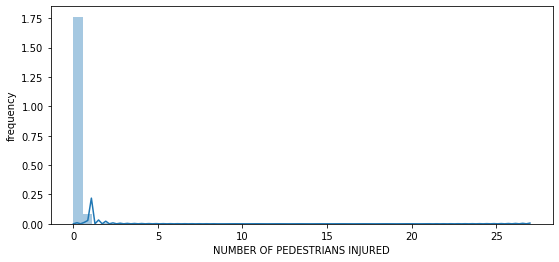

Skewness :  6.5699106176443705
*****************************************************************************************************


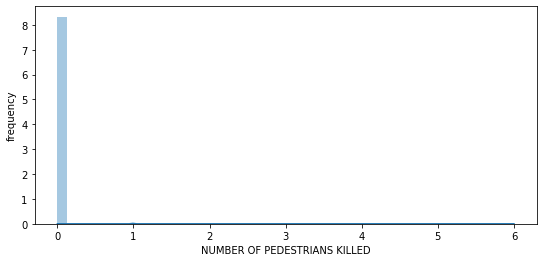

Skewness :  48.776810504262436
*****************************************************************************************************


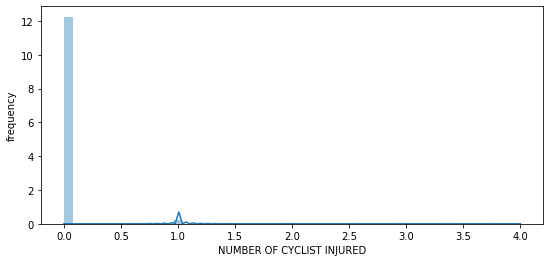

Skewness :  7.198311080072557
*****************************************************************************************************


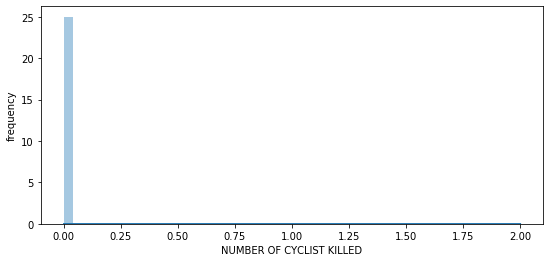

Skewness :  113.58651049477362
*****************************************************************************************************


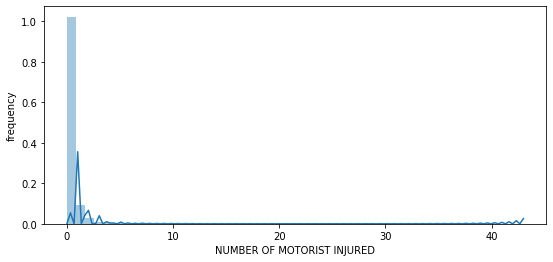

Skewness :  5.695864237970746
*****************************************************************************************************


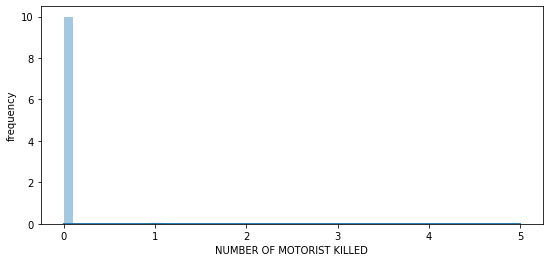

Skewness :  66.64769901774265
*****************************************************************************************************


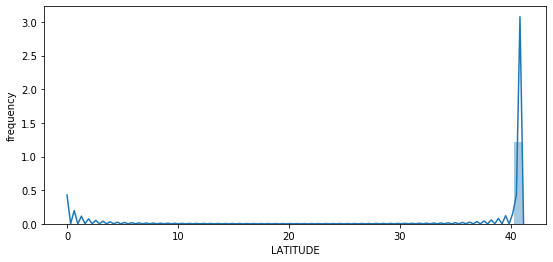

Skewness :  -64.83678917994041
*****************************************************************************************************


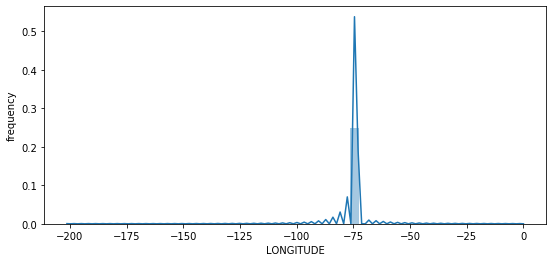

Skewness :  -13.273260906720244
*****************************************************************************************************


In [22]:
print("For train data :")
for i in conti:
    plt.figure(figsize=(9,4))
    sns.distplot(crash_conti[i])
    plt.ylabel('frequency')
    plt.show()
    print("Skewness : ",crash_conti[i].skew())
    print("*"*101)


### Observation :
- All the above graph is either right skew or left skew.


In [23]:
# checking correlation among continuous variables

crash_conti.corr()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,LATITUDE,LONGITUDE
NUMBER OF PERSONS INJURED,1.000,0.021,0.294,0.007,0.167,0.002,0.909,0.024,-0.001,0.002
NUMBER OF PERSONS KILLED,0.021,1.000,0.014,0.728,-0.002,0.282,0.018,0.639,0.000,-0.000
NUMBER OF PEDESTRIANS INJURED,0.294,0.014,1.000,0.020,-0.027,0.004,-0.054,-0.001,0.002,0.000
NUMBER OF PEDESTRIANS KILLED,0.007,0.728,0.020,1.000,-0.002,0.040,0.001,0.005,0.000,-0.000
NUMBER OF CYCLIST INJURED,0.167,-0.002,-0.027,-0.002,1.000,0.003,-0.040,-0.003,-0.000,-0.001
NUMBER OF CYCLIST KILLED,0.002,0.282,0.004,0.040,0.003,1.000,0.000,-0.000,0.000,-0.000
NUMBER OF MOTORIST INJURED,0.909,0.018,-0.054,0.001,-0.040,0.000,1.000,0.027,-0.001,0.003
NUMBER OF MOTORIST KILLED,0.024,0.639,-0.001,0.005,-0.003,-0.000,0.027,1.000,0.000,0.000
LATITUDE,-0.001,0.000,0.002,0.000,-0.000,0.000,-0.001,0.000,1.000,-0.718
LONGITUDE,0.002,-0.000,0.000,-0.000,-0.001,-0.000,0.003,0.000,-0.718,1.000


### Observations :
- NUMBER OF PERSONS INJURED is strongly correlated with NUMBER OF MOTORIST INJURED.

- NUMBER OF PERSONS KILLED is strongly correlated with NUMBER OF PEDESTRIANS KILLED.

- NUMBER OF MOTORIST KILLED is strongly correlated with NUMBER OF PERSONS KILLED.

- LONGITUDE is strongly correlated with LATITUDE.

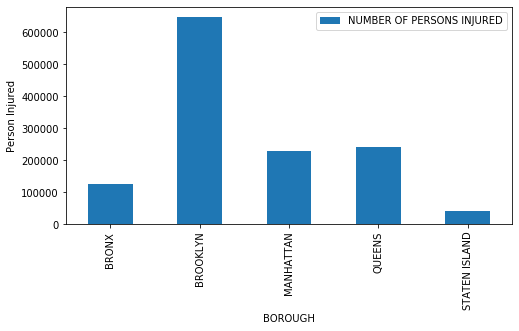

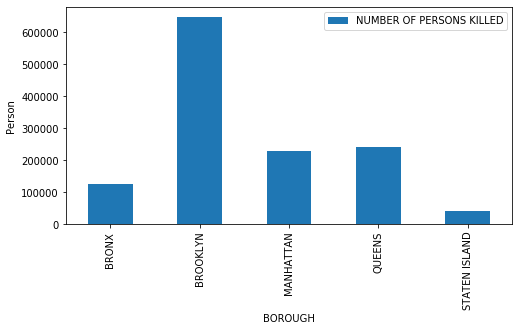

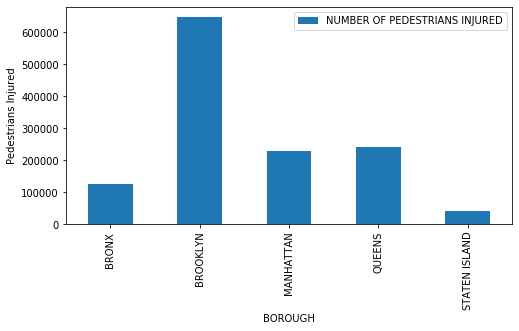

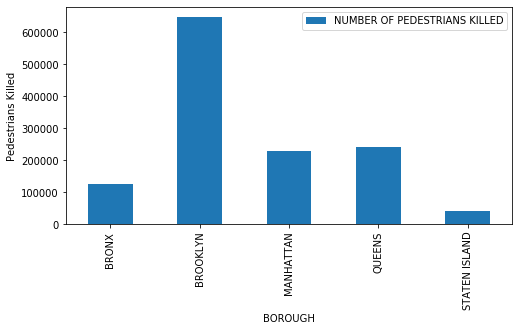

In [24]:
pd.pivot_table(data=crash,index='BOROUGH',values='NUMBER OF PERSONS INJURED',aggfunc=len).plot(kind='bar',figsize=(8,4))
plt.ylabel('Person Injured')
plt.show()

pd.pivot_table(data=crash,index='BOROUGH',values='NUMBER OF PERSONS KILLED',aggfunc=len).plot(kind='bar',figsize=(8,4))
plt.ylabel('Person ')
plt.show()

pd.pivot_table(data=crash,index='BOROUGH',values='NUMBER OF PEDESTRIANS INJURED',aggfunc=len).plot(kind='bar',figsize=(8,4))
plt.ylabel('Pedestrians Injured')
plt.show()

pd.pivot_table(data=crash,index='BOROUGH',values='NUMBER OF PEDESTRIANS KILLED',aggfunc=len).plot(kind='bar',figsize=(8,4))
plt.ylabel('Pedestrians Killed')
plt.show()



#### Observations :
- Data is similar that's why all graph is similar.
- Similarly, we can do for other columns as well.

## Draw Conclusions using Inferential Statistics
Pick an interesting hypothesis and test it using hypothesis testing. Clearly state what your hypothesis is, what is the population, the sample(s) and the statistics and parameters involved.Explain your choice of p value and significance level.

**Hint:** Two interesting hypotheses you can test could be:
- The difference in the mean hourly accident rates of two different boroughs throughout the year.
- The difference in the mean hourly accidents during day and night time. 

In [25]:
# checking number of times each value appearing in 'BOROUGH' column

crash['BOROUGH'].value_counts()

BROOKLYN         646792
QUEENS           241199
MANHATTAN        229290
BRONX            123833
STATEN ISLAND     41981
Name: BOROUGH, dtype: int64

#### Observation :
- 'BROOKLYN' occuring most number of times, I am going to use this data for the formulation of hypothesis.

In [26]:
# extracting all rows which contains 'BROOKLYN'

accident = crash[crash['BOROUGH']=='BROOKLYN']
accident.shape

(646792, 20)

In [27]:
# only two columns are required for hypothesis testing

population = accident[['BOROUGH','NUMBER OF PERSONS INJURED']]
population

,BOROUGH,NUMBER OF PERSONS INJURED
0,BROOKLYN,0
1,BROOKLYN,0
3,BROOKLYN,0
4,BROOKLYN,0
6,BROOKLYN,1
...,...,...
1293995,BROOKLYN,0
1293998,BROOKLYN,0
1294000,BROOKLYN,1
1294001,BROOKLYN,0


#### Hypothesis formulation

- Null Hypothesis :
Average number of person injured in BROOKLYN = 0.19 (19 Injuries per 100)
- Alternate Hypothesis :
Average number of person injured in BROOKLYN != 0.19 (19 Injuries per 100)

So, It is two tailed test.

#### Population :
- population dataframe which contains columns BOROUGH and NUMBER OF PERSONS INJURED and number of rows equals 666792.

#### Sample :
- I will pick 100 random data from population dataframe.

#### Reference for Null Hypothesis and Alternate Hypothesis data :
https://www.autoinsurancecenter.com/traffic-accidents-in-new-york-city.htm


In [28]:
# extracting 100 rows from population data 

sample = population.sample(n=100,random_state=250)
sample

,BOROUGH,NUMBER OF PERSONS INJURED
59052,BROOKLYN,0
233336,BROOKLYN,0
324141,BROOKLYN,6
885118,BROOKLYN,2
477122,BROOKLYN,0
...,...,...
1238330,BROOKLYN,0
1003787,BROOKLYN,1
365419,BROOKLYN,0
1001865,BROOKLYN,0


In [29]:
mean = sample['NUMBER OF PERSONS INJURED'].mean()
std = sample['NUMBER OF PERSONS INJURED'].std()

print('sample mean : ',mean)
print('sample standard deviation : ',std)

sample mean :  0.33
sample standard deviation :  0.888251033767989


In [31]:
# now calculating Z - Score using formula 
# z = (sample mean - population mean) / (sample standard deviation / square root of sample size)

z = (mean - 0.19)/(std/np.sqrt(100))
z

1.576131011141249

#### Results :

#### Method 1 :
- Generally, significance level = 5 % or 3% is taken in industry and there is no such fixed rule for it, it all depends on business problem.I am taking 5 % significance level.

- So 5/2 % = 2.5 % or 0.025 is the area on both side of normal distribution curve (two-tailed).

- so for 95% confidence interval, z lies from -1.96 and 1.96 .

- z score ( 1.57 ) which we had calculated lies in the interval -1.96 to 1.96 implies, we can't reject the null hypothesis or failed to reject the null hypothesis.

#### Method 2 :
- Taking p-value = 5 % or 0.05 .
- The area to the left of z = -1.57 is 0.05821 .
- But it is two tailed test so total area is 0.05821 * 2 = 0.11642
- total area, 0.11642 is greater than 0.05 implies, we can't reject the null hypothesis or failed to reject the null hypothesis.

So the data given in that article (whose link I have attached) is correct.



#### Note :

- Similarly, we can form other hypothesis by observing (and thinking possibility) on different columns.

### References :
- https://www.youtube.com/watch?v=oqMImCeXi6o { for loading dataset from drive }
- Stackoveflow { to clear any confusion which arise during any step of analysis }

#### Note :
- I had not work with date-time etc related data/concept depthwise that's why I had not used column 1 and column 2 for hypothesis testing.
- Willing to learn these concepts as well.